In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X,y=load_from_arff("E:/IDMdownload/genbase/genbase.arff",label_count=27,label_location='end')
X,y=X.toarray(),y.toarray()
X.shape

(662, 1186)

In [4]:
bls = bls3.broadnet(maptimes = 5,
               enhencetimes = 5,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=2
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98226 minvalue 0.01986 


E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98303 minvalue 0.02499 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98073 minvalue 0.02099 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97391 minvalue 0.02396 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97089 minvalue 0.03716 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95754 minvalue 0.03316 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97181 minvalue 0.0239 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda3\envs\openne\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95704 minvalue 0.01225 


E:\desktop\Broad-Learning-System\BroadLearning\bls3.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-data))


number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95971 minvalue 0.02098 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97736 minvalue 0.02569 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.95489 minvalue 0.02538 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96756 minvalue 0.01533 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97231 minvalue 0.04041 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96934 minvalue 0.02724 
number of mapping nodes 5930, number of enhence nodes 5930
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

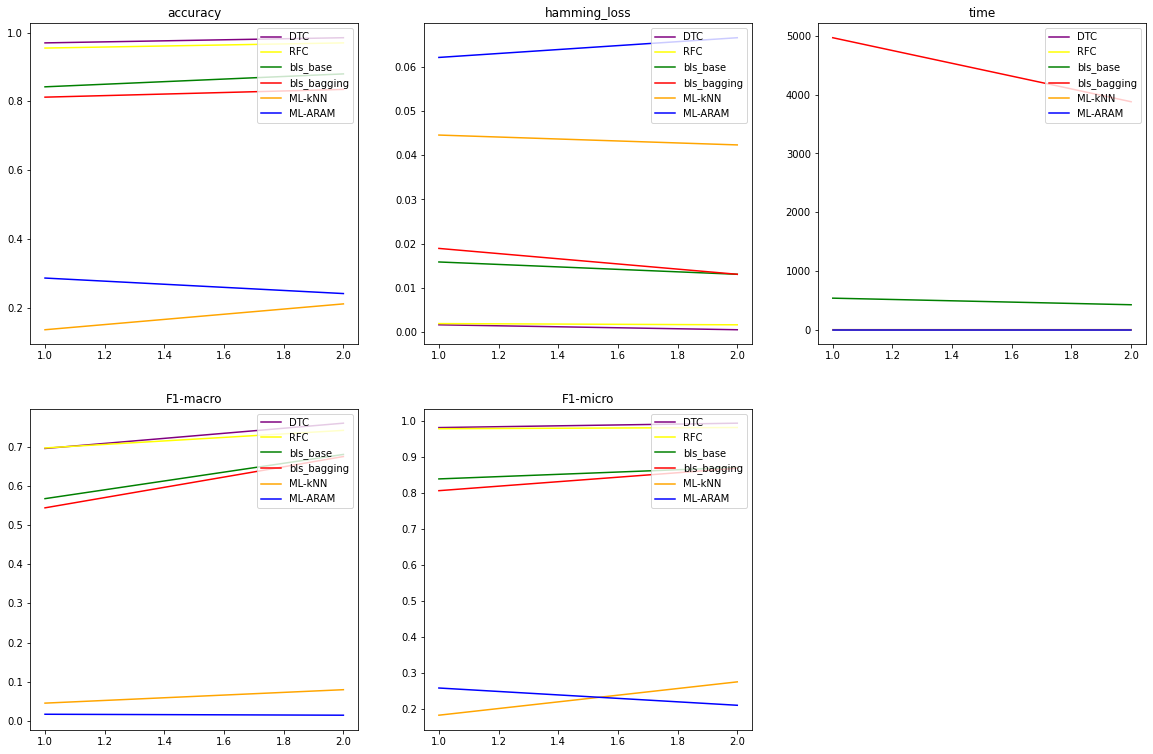

In [10]:
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.9774436090225564
the hamming loss of model1 0.001113895850737956
the time of model1 0.008649899999715549
the F1 macro score of model1 0.7278523945190611
the F1 micro score of model1 0.9880226789510985


the accuracy score of model2 0.9624060150375939
the hamming loss of model2 0.0018100807574491784
the time of model2 0.04552505000019191
the F1 macro score of model2 0.7193422832311721
the F1 micro score of model2 0.9804331306990881


the accuracy score of model3 0.8609022556390977
the hamming loss of model3 0.014480646059593427
the time of model3 481.2372467499998
the F1 macro score of model3 0.6238705333597216
the F1 micro score of model3 0.8553347482153193


the accuracy score of model4 0.8233082706766917
the hamming loss of model4 0.016012252854358117
the time of model4 4424.2763057
the F1 macro score of model4 0.609449202978002
the F1 micro score of model4 0.8379494808812358


the accuracy score of model5 0.17293233082706766
the hamming loss of model5 

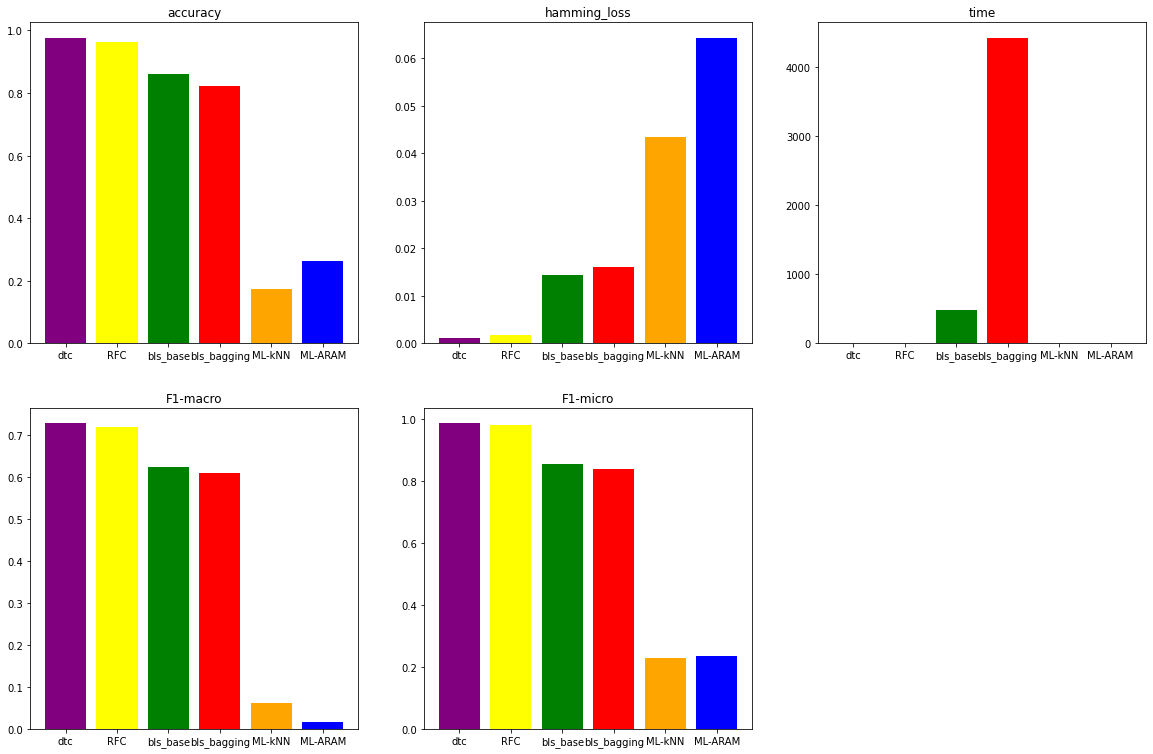

In [13]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4],color=['purple','yellow','green','red','orange','blue'])
plt.show()